# Homework 6: Hypothesis Tests

Welcome to the sixth homework! 

In this homework you practice running hypothesis tests.

Please complete this notebook by filling in the cells provided. 


**Deadline:**

This assignment is due **Friday July 25 at 10pm in Gradescope.** 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. 

## Getting started

In order to complete the homework, it is necessary to download a few files. Please run the code below **only once** to download data needed to complete the homework. To run the code, click in the cell below and press the play button (or press shift-enter). 

In [3]:
# if you are running this notebook in colabs, please uncomment and run the following two lines
# !pip install https://github.com/emeyers/YData_package/tarball/master

In [4]:
# Please run this code once to download the files you will need to complete the homework 

import YData 

# Downlooad college scorecard data and map files
YData.download.download_data("college_scorecard_subset_2021_2022.csv")
YData.download.download_data("CCBASIC_categories.csv")


The file `college_scorecard_subset_2021_2022.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `CCBASIC_categories.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


## 0. Quote and reaction

There is no quote and reaction for this week. Please use the extra time given to start on your peer review of the class projects. 

In [6]:
# This cell imports functions from packages we will use below.
# Please run it each time you load the Jupyter notebook

import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Hypothesis test on a single proportion: Was Paul the Octopus psychic? 

Paul the Octopus (26 January 2008– 26 October 2010), was a common octopus who was suspected of having psychic abilities. To test Paul’s psychic abilities, workers at the Sea Life Centre in Oberhausen, Germany, assesed whether Paul could predict the winners of the 2010 World Cup soccer games. Before each soccer game, two containers of food (mussels) were lowered into the octopus’ tank. The containers were identical, except for country flags of the opposing teams, one on each container. Whichever container Paul opened was deemed his predicted winner.

During the 2010 World Cup, Paul became famous for correctly predicting 11 out of 13 soccer games. We will use hypothesis testing to determine the probability that Paul would get 11 out of 13 correct if he was merely guessing.

![Paul](https://c02.purpledshub.com/uploads/sites/41/2018/10/GettyImages-102736984-df583bb.jpg)


**Question 1.1 (4 points)**: Please write down the 5 steps for running a hypothesis test. We will use these steps to run an actual hypothesis test in the rest of the problem, but let’s just start by writing down what the steps are. You can look at the lecture slides if you need to, although you should memorize these steps.

<font color='red'> **Answer**:

1.  state the null and alternative hypothesis
2.  calculate the observed statistic
3.  create the null distribution
4.  calculate the p-value
5.  make a decision

**Question 1.2 (5 points)**: Now state the null and alternative hypotheses both using words and as an equation/inequality using the appropriate symbols we discussed in class. I.e., you should have four statements: 2 statements for stating the hypotheses in words, and 2 statments for stating them using symbols. 

<font color='red'> **Answer**:

*In words:*

Null hypothesis: Paul is psychic

Alternative hypothesis: Paul is not a psychic

*In symbols:*

$H_0:\pi=0.5$

$H_A:\pi>0.5$

**Question 1.3 (5 points)**: Now please do step 2 of hypothesis testing by computing the statistic of interest and save it in the variable `paul_stat`. In the answer section, please write down the symbol we should use to denote the observed statistic based on the symbols we discussed in class. Also, write down whether you think the value of this observed statistic is likely to be obtained if Paul was guessing.

In [13]:
paul_stat = 11/13
paul_stat


0.8461538461538461

<font color='red'> **Answer**: $\pi_{Paul}=0.85$ . I think it is unlikely to happen if Paul is just guessing, but there is a little probability that he actually does.





**Question 1.4 (5 points)**: Let's now to step 3 of hypothesis testing. To start, please write a function `generate_proportion(n, heads_probability)` that simulates a proportion of "heads" one might get from flipping *n* coins. Each coin should have a probaility `heads_probability` of getting a "head" on each coin flip (assuming each coin flip is independent).

Once you have written the `generate_proportion(n, heads_probability)` function, use it to generate one example of a proportion of heads Paul might get if he was merely getting during his World Cup predictions. 

Hint: Looking at the class 18 code might help, but please make sure you are understanding the code you write below. 

In [16]:
# write the generate_proportion() function 
def generate_proportion(n, heads_probability):
    rand_nums = np.random.rand(n)
    head_prop = np.sum(rand_nums<heads_probability)/n
    return head_prop


# use the generate_proportion() function to simulate one example of the proportion of correct preditions Paul might make if he was merely guessing
generate_proportion(1000,0.5)


0.493

**Question 1.5 (5 points)**: Now use for loop and the `generate_proportion()` function to generate a null distribution that would occur if Paul was guessing that has 10,000 simulated proportions. Save the values in this null distribution to a variable called `null_dist`. 


In [18]:
# create a null distribution 
num = 10000
repeat = 13
probability = 0.5
null_dist = []
for i in range(num):
    storage = generate_proportion(repeat,probability)
    null_dist.append(storage)




**Question 1.6 (5 points)**: Next plot the null distribution as a histogram, set the `bins` argument to 50 so that your histogram has bins. Also add a red circle at the observed statistic value. Based on looking at this plot, what would you estimate the p-value to be? 


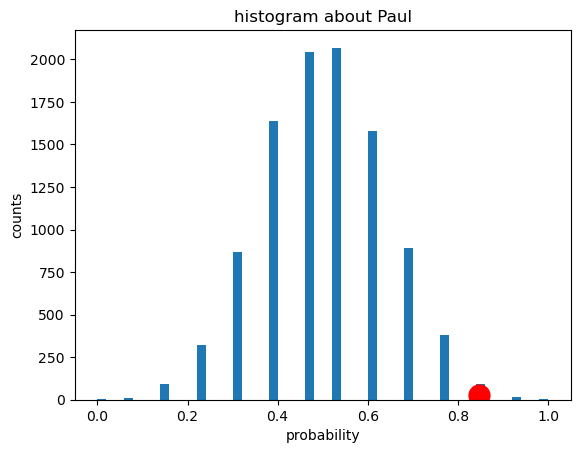

In [20]:
# visualize the null distribution and the observed statistic
plt.hist(null_dist,bins = 50);
plt.plot(paul_stat,30,'.',color = "red",markersize=30);
plt.xlabel("probability");
plt.ylabel("counts");
plt.title("histogram about Paul");


<font color='red'> **Answer**: I estimate the p-value to be 0 because it seems unlikely that the red point is the center of the histgram (which means the null hypothesis is true).

      

**Question 1.7 (5 points)**: Next do step 4 of hypothesis testing by calculating the p-value and print out the value you get.

In [23]:
# calculate the p-value 
stats_more_extreme = np.array(null_dist) >= paul_stat
p_value = np.mean(stats_more_extreme)
print(p_value)

0.0107


**Question 1.8 (5 points)**: Finally, do step 5 of hypothesis testing and make a judgment call as to whether you believe Paul is psychic based on the
p-value and any other information you think is relevant. Make sure to justify your answer to explain Paul’s prediction abilities.

<font color='red'> **Answer**: Due to the test we did above, there is little probability that Paul is just guessing, which means that Paul is likely to be a psychic. However, since it is not equal to 0, there is a tiny probability that Paul is just lucky.




## 2. Hypothesis test on mean SAT scores between different types of colleges

As you will recall from homework 6, the college scorecard contains data on higher education institutions in the United States. 

As you will also hopefully recall from creating interactive visualizations of SAT scores on question 1.5 from homework 6, colleges that had the highest SAT scores had Carnegie classifications of "Doctoral Universities: Very High Research Activity" (`CCBASIC` value of 15) and "Baccalaureate Colleges: Arts & Sciences Focus" (`CCBASIC` value of 21). 

Let's now run a hypothesis test to test whether, on average, students' average SAT scores from "Doctoral Universities: Very High Research Activity" is higher than the average SAT scores for students who attend "Baccalaureate Colleges: Arts & Sciences Focus"; i.e., is the average SAT score over all scores of these types the same. 

The college scorecard data is loaded for you in the following cell, and a codebook for a few of the columns is below. 


#### Codebook

1. `UNITID`: Unit ID for institution

2. `INSTNM`: Institution name

10. `CCBASIC`: Carnegie Classification; e.g., 15 = Doctoral Universities: Very High Research Activity

11. `ADM_RATE`: Admission rate

12. `SAT_AVG`: Average SAT equivalent score of students admitted

18. `TUITFTE`: Net tuition revenue per full-time equivalent student

36. `MD_EARN_WNE_MALE0_P10`: Median earnings of non-male students working and not enrolled 10 years after entry

37. `MD_EARN_WNE_MALE1_P10`: Median earnings of male students working and not enrolled 10 years after entry



In [27]:
scorecard = pd.read_csv("college_scorecard_subset_2021_2022.csv")

scorecard.head(3)

,UNITID,INSTNM,CITY,STABBR,ZIP,HIGHDEG,CONTROL,LATITUDE,LONGITUDE,CCBASIC,...,UGDS_MEN,UGDS_WOMEN,GRADS,BOOKSUPPLY,ROOMBOARD_ON,ENDOWBEGIN,ENDOWEND,GT_THRESHOLD_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,Alabama A & M University,Normal,AL,35762,4,1,34.783368,-86.568502,18.0,...,0.3978,0.6022,884.0,1600.0,9240.0,NaN,NaN,0.6044,36050.0,36377.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,4,1,33.505697,-86.799345,15.0,...,0.3816,0.6184,8685.0,1200.0,12307.0,537349307.0,539858544.0,0.7472,42007.0,56164.0
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,4,1,34.724557,-86.640449,16.0,...,0.5891,0.4109,1972.0,2200.0,10652.0,77250279.0,75837207.0,0.7769,45170.0,66070.0


**Question 2.1 (4 points)**: As always, please start your hypothesis test with "step 1" by writing down the null and alternative hypotheses using words (i.e., a 1-2 sentence written description) and using the symbols we have discussed in class. 


<font color='red'> **Answer**:

*In words:*

Null hypothesis:  students' average SAT scores from "Doctoral Universities: Very High Research Activity" is same as the average SAT scores for students who attend "Baccalaureate Colleges: Arts & Sciences Focus"

Alternative hypothesis:  students' average SAT scores from "Doctoral Universities: Very High Research Activity" is higher than the average SAT scores for students who attend "Baccalaureate Colleges: Arts & Sciences Focus"




*In symbols:*

$H_0:\mu_{Doctoral}=\mu_{Baccalaureate}$

$H_A:\mu_{Doctoral}>\mu_{Baccalaureate}$







**Question 2.2 (4 points)**: Now let's start on step 2 of hypothesis testing by creating our statistic of interest and visualizing our data. To do this, we need to reduce our data to just the relevant data. Please create a name `scorecard2` which has only data from institutions that are classified as "Doctoral Universities: Very High Research Activity" (`CCBASIC` value of 15) and "Baccalaureate Colleges: Arts & Sciences Focus" (`CCBASIC` value of 21). Also, to make our analyses easier, `scorecard2` should only have two columns which are `CCBASIC` and `SAT_AVG`. 

Once, you have created this DataFrame, print the first 5 rows, and the number of rows in the DataFrame, to show your work. 


In [31]:
scorecard2 = scorecard[["CCBASIC","SAT_AVG"]]
scorecard2 = scorecard2.query("CCBASIC==15 or CCBASIC == 21")
print(scorecard2.head())
print(scorecard2.shape[0])

    CCBASIC  SAT_AVG
1      15.0   1245.0
4      15.0   1262.0
7      15.0   1302.0
8      21.0   1202.0
14     21.0   1068.0
363


**Question 2.3 (3 points)**: Now create a DataFrame called `mean_SAT` which has the mean SAT scores for "Doctoral Universities: Very High Research Activity" (`CCBASIC` value of 15) and for "Baccalaureate Colleges: Arts & Sciences Focus" (`CCBASIC` value of 21); i.e., there should be two rows correspnding to the two institution types and a single column called `SAT_AVG` which has the average scores for these two institution types averaged over all colleges of a particular type. 


In [33]:
mean_SAT = scorecard2.groupby("CCBASIC").agg("mean")
mean_SAT

,SAT_AVG
CCBASIC,
15.0,1320.752000
21.0,1211.876623


**Question 2.4 (3 points)**: Now let's actually do step 2 by using the `mean_SAT` DataFrame you created above to create a name `obs_stat` which has the statistic of interest. For our hypothesis test here, our statistic of interest should be $\bar{x}_{Doc} - \bar{x}_{Bac}$; where $\bar{x}_{Doc}$ is the average value of the SAT_AVG scores over all "Doctoral Universities: Very High Research Activity" institutions and $\bar{x}_{Bac}$ is the SAT_AVG scores averaged over all "Baccalaureate Colleges: Arts & Sciences Focus" institutions. 

Print the value of `obs_stat` to show your work.

In [35]:
obs_stat = mean_SAT.loc[15,"SAT_AVG"]-mean_SAT.loc[21,"SAT_AVG"]
obs_stat

108.8753766233765

**Question 2.5 (4 points)**: Before we go on to step 3 of creating the null distribution, let's visualize the data. 

Please use seaborn to visualize the data in a way that gives insight into the question of interest. In particular, try to visualize the whole data set in `scorecard2` (rather than just looking at the mean statistics that you calculated above) in a way that gives meaningful insight. In the answer section, report, based on looking at the visualization you created, whether you believe there is a difference in the mean (average) SAT scores between these different type of schools. 


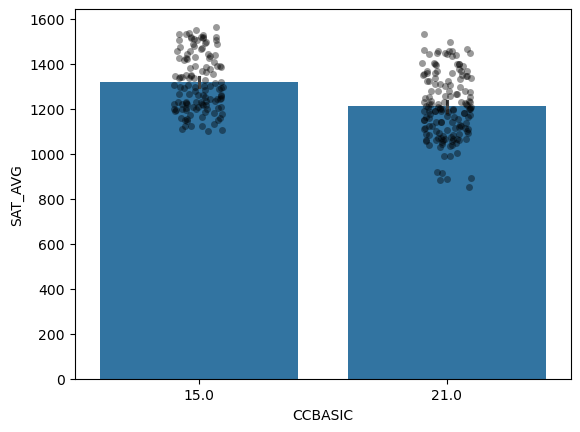

In [37]:
sns.barplot(data=scorecard2, x="CCBASIC", y="SAT_AVG");
sns.stripplot(data=scorecard2, x="CCBASIC", y="SAT_AVG", color="black", alpha=0.4, jitter=True);

<font color='red'> **Answer**: I think there is a significant difference in the mean of SAT scores between these 2 different type of schools.






**Question 2.6 (4 points)**: Now, let's run step 3 of our hypothesis test by creating a null distribution. 

To do this, let's first write a function called `mean_diff(scorecard_data)` which takes a "scorecard" DataFrame that is the same as the `scorecard2` DataFrame above; i.e., the DataFrame should have a column called `CCBASIC` that has two levels corresponding to Carnegie classification levels 15 and 21, and a column called `SAT_AVG` that has the average SAT scores.

From this `scorecard_data` DataFrame, the function should return the difference in means from schools with a `CCBASIC` of Carnegie classification levels 15 and 21.

Test that your function works by running it on the `scorecard2` DataFrame and showing that it returns the same observed statistic value that you calculated in quesiton 2.4.


Hint: To write this function, simply use the code from questions 2.3 and 2.4 and wrap the code into a function. 


In [41]:
def mean_diff(scorecard_data):
    mean_SAT = scorecard_data.groupby("CCBASIC").agg("mean")
    diff = mean_SAT.loc[15,"SAT_AVG"]-mean_SAT.loc[21,"SAT_AVG"]
    return diff
    
mean_diff(scorecard2)

108.8753766233765

**Question 2.7 (4 points)**: Now let's create one point in our null distribution. 

To do this, please create a DataFrame called `scorecard_shuff` which is the same as the `scorecard2` DataFrame but the values in the `CCBASIC` column should be shuffled to be in random order. Once you have created this `scorecard_shuff` print the first 5 rows to show that you have done this correctly. 

Hint: To shuffle the values in the column, passing the `CCBASIC` Series values to the `np.random.permutation()` will be useful. 


In [44]:
scorecard_shuff = scorecard2.copy()
scorecard_shuff["CCBASIC"] = np.random.permutation(scorecard_shuff["CCBASIC"])
scorecard_shuff.head()

,CCBASIC,SAT_AVG
1,15.0,1245.0
4,21.0,1262.0
7,15.0,1302.0
8,15.0,1202.0
14,15.0,1068.0


In [46]:
# method 2
# 这种方法只换顺序，不改变ccbasic和sat_avg的匹配关系
# scorecard_shuff2 = scorecard2.copy()
# scorecard_shuff2 = scorecard_shuff2.sample(frac=1)
# scorecard_shuff2.head()

**Question 2.8 (3 points)**: Now that you have a shuffled data frame, use it with the `mean_diff()` function to generate one statistic consistent with the null distribution. Show that this works by printing the shuffled statistic value below. 

In [49]:
mean_diff(scorecard_shuff)


-15.274502169318112

**Question 2.9 (4 points)**: Now that we can create one statistic consistent with the null hypothesis, we can create a full null distribution by simply repeating this process 10,000 times.

Starting with an empty list called `null_dist`, use a for loop to create a null distribution by appending randomly shuffled statistic values onto this list. Print the length of the list at the end of the cell to show the code worked.
    

In [52]:
null_dist = []
for i in range(10000):
    scorecard_shuff = scorecard2.copy()
    scorecard_shuff["CCBASIC"] = np.random.permutation(scorecard_shuff["CCBASIC"])
    null_dist.append(mean_diff(scorecard_shuff))

print(len(null_dist))
print(np.mean(null_dist))

10000
0.13447875772333984


**Question 2.10 (4 points)**: Let's now visualize the null distribution as a histogram. 

From looking at the null distribution, report in the answer section what you think the p-value will be. 

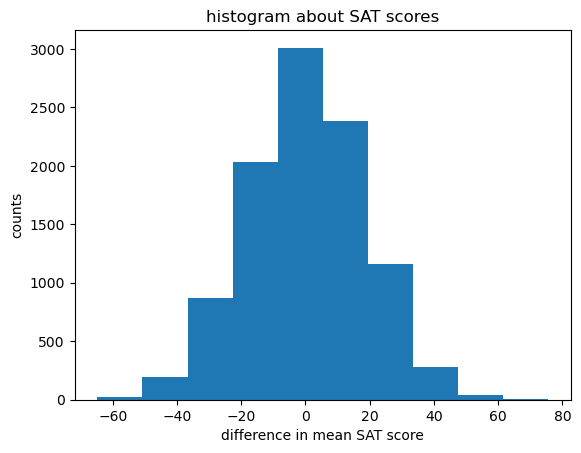

In [54]:
plt.hist(null_dist);
plt.xlabel("difference in mean SAT score");
plt.ylabel("counts");
plt.title("histogram about SAT scores");

<font color='red'> **Answer**:I think the p-value is 0






**Question 2.11 (3 points)**: Now calculate the actual p-value (i.e., the proportion of statistics in the null distribution that are as large or larger than the observed statistic). Print out the p-value below to show your work.


In [59]:
p_value = sum(null_dist>obs_stat)/len(null_dist)
print(p_value)

0.0


**Question 2.12 (3 points)**: Based on the p-value you calculated, describe what you would conclude in terms of the mean SAT scores for the different types of colleges.

<font color='red'> **Answer**: I would say that there is a significant difference in SAT scores between different types of colleges.





## 3. Reflection (3 points)

Please reflect on how the homework went by going to Canvas, going to the Quizzes link, and clicking on reflection on homework 6. 



## 4. Submission

Please submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left hand side of the class home page. The problems in each homework assignment are numbered. **NOTE:** When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. **Failure to mark pages correctly will result in points being deducted from your homework score.**

If you are running Jupyter Notebooks through an Anaconda installation on your own computer, you can produce the .pdf by completing the following steps:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

If you are running the assignment in a Google Colabs, you can use the following instructions: 
1.  Go to "File" at the top-left of your Jupyter Notebook and select "File" and "Print" (note you will not actually be printing)
2. From the print window, select the option to save as a .pdf
3. Be sure to look over the pdf file to make sure all your code and written work is saved in a clear way.